In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
import scipy.stats as stats

In [3]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston=load_boston()

In [6]:
bos=pd.DataFrame(boston.data)

In [7]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
bos.columns=boston.feature_names

In [11]:
bos['price']=boston.target

In [12]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [15]:
# Checking for Null Values
bos.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

C:\Users\Rakesh Kumar Vemula\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rakesh Kumar Vemula\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rakesh Kumar Vemula\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

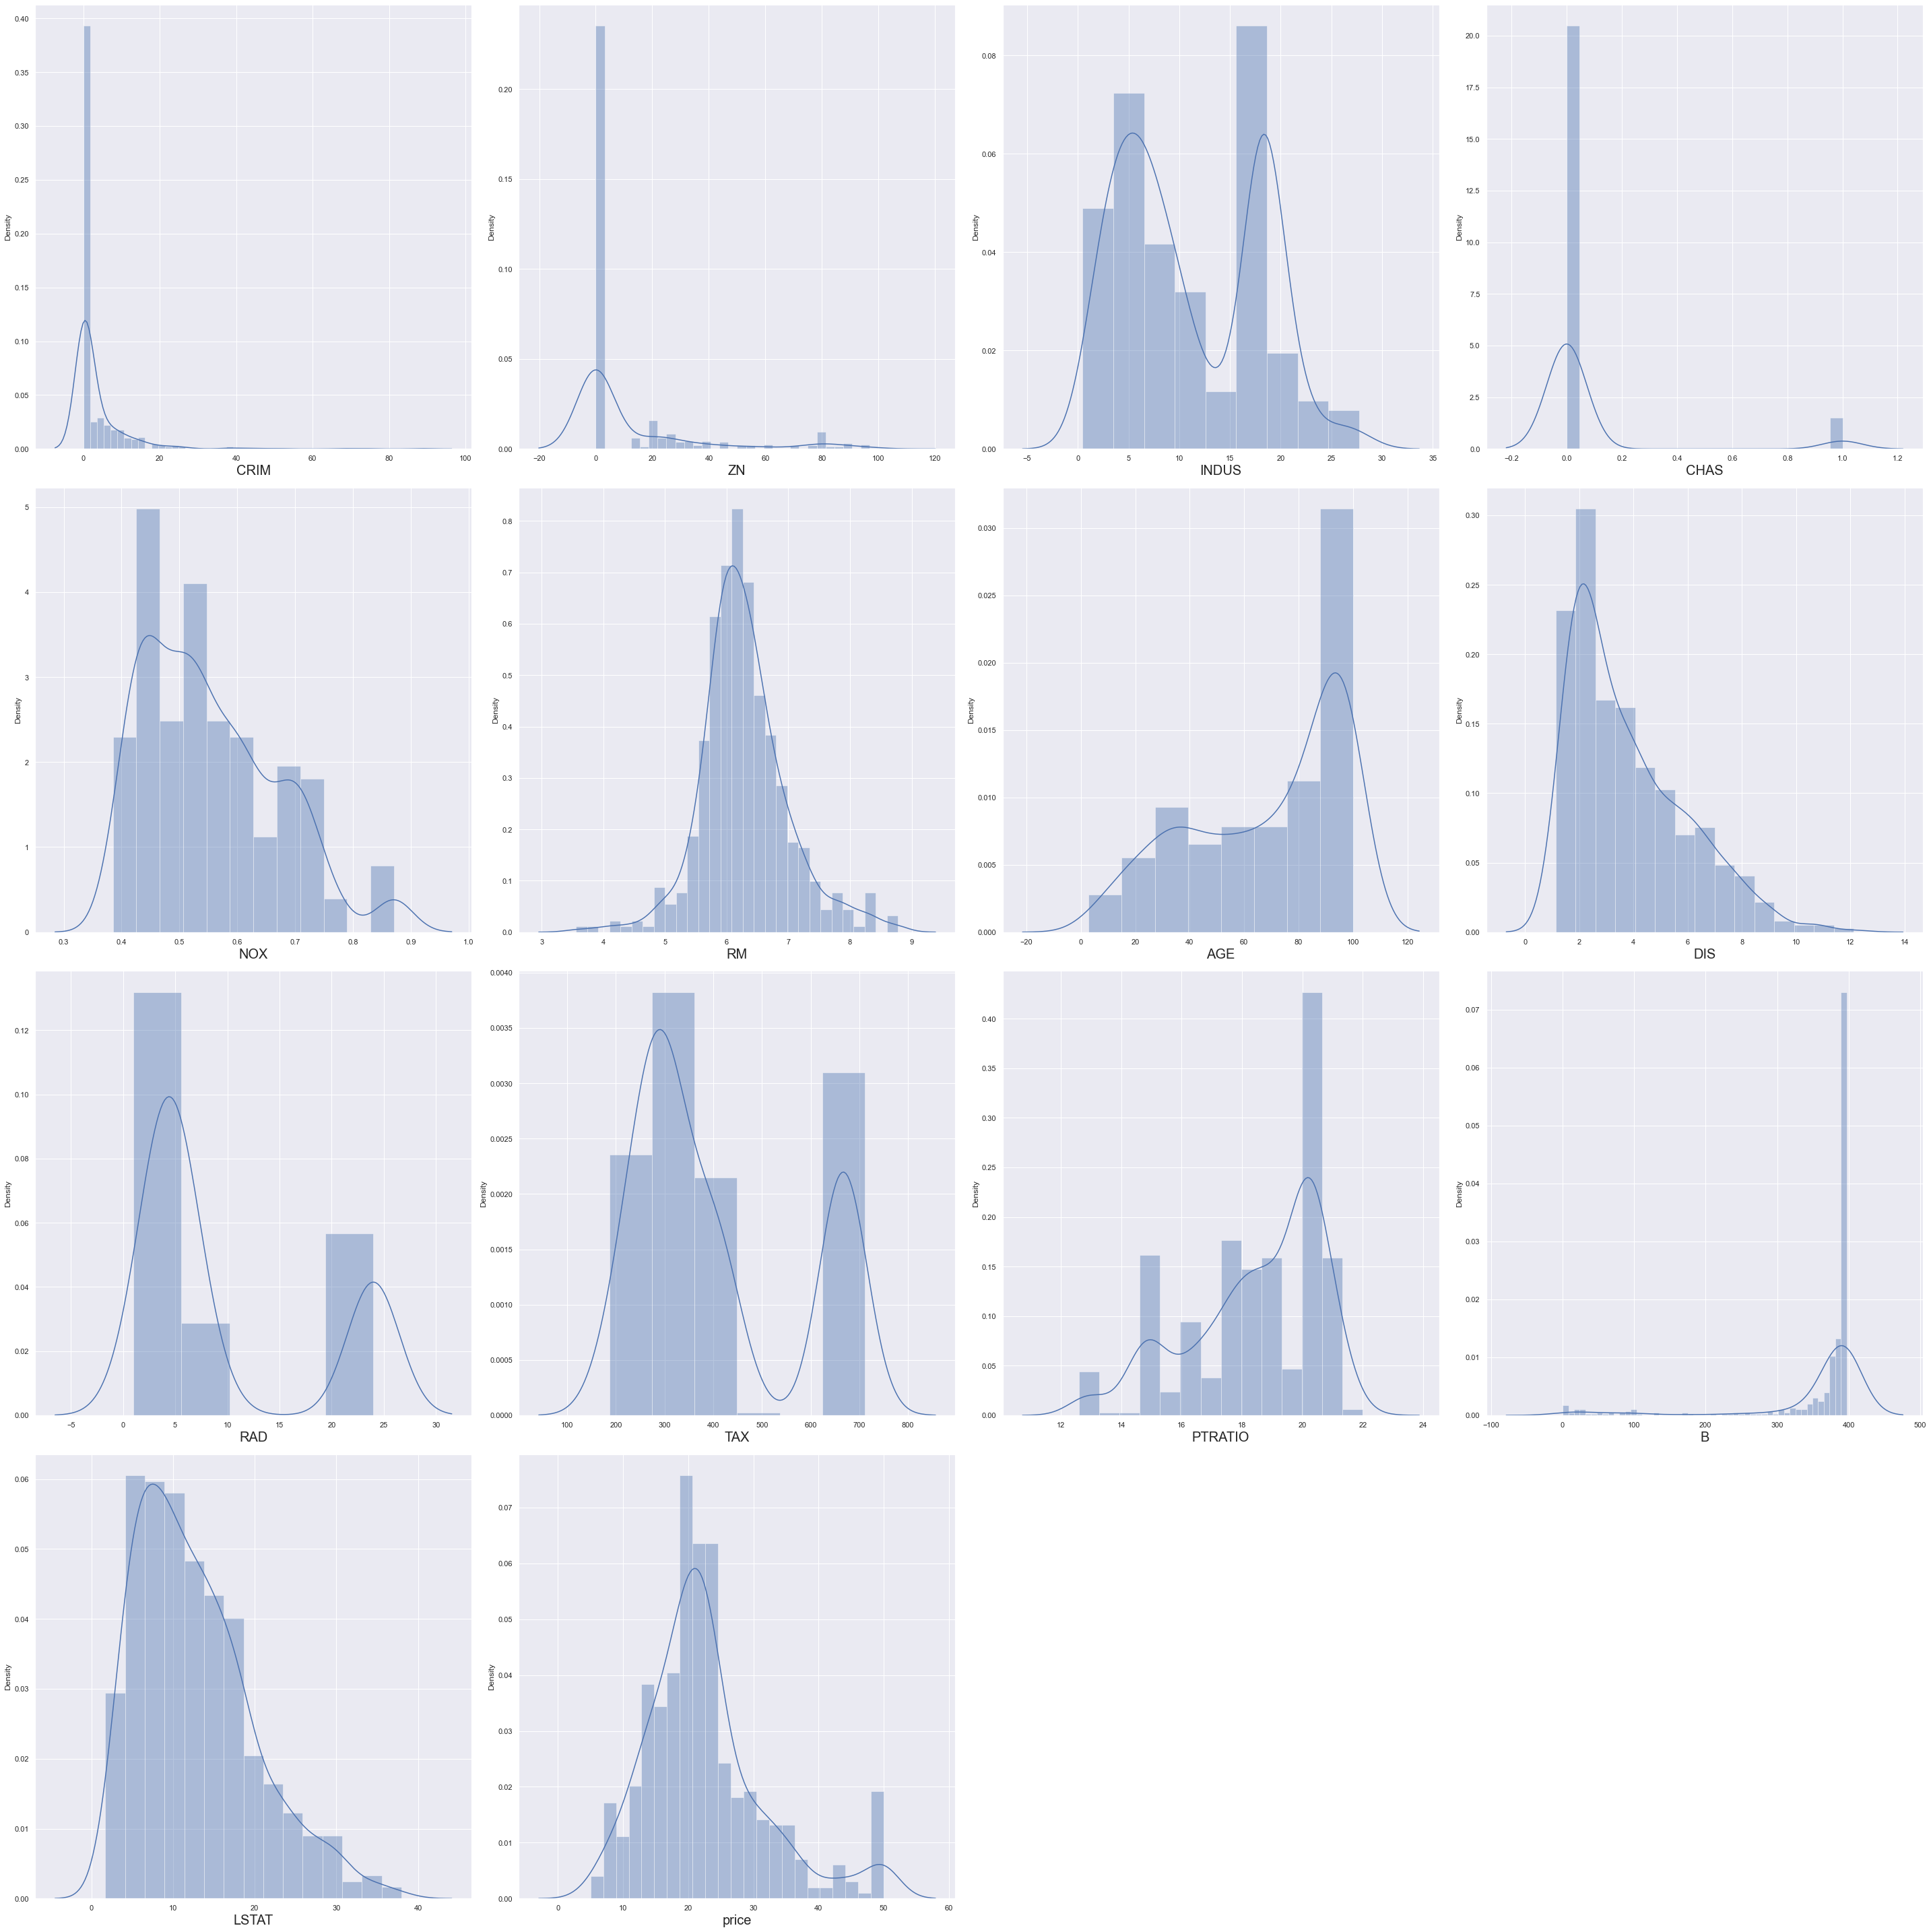

In [16]:
# Distrubution of the Data
plt.figure(figsize=(40,40),facecolor='white')
plotnumber=1
for column in bos:
    if plotnumber<=20:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [17]:
# Relation between Independent variable and Dependent Variable
y=bos['price']
x=bos.drop(columns=['price'])

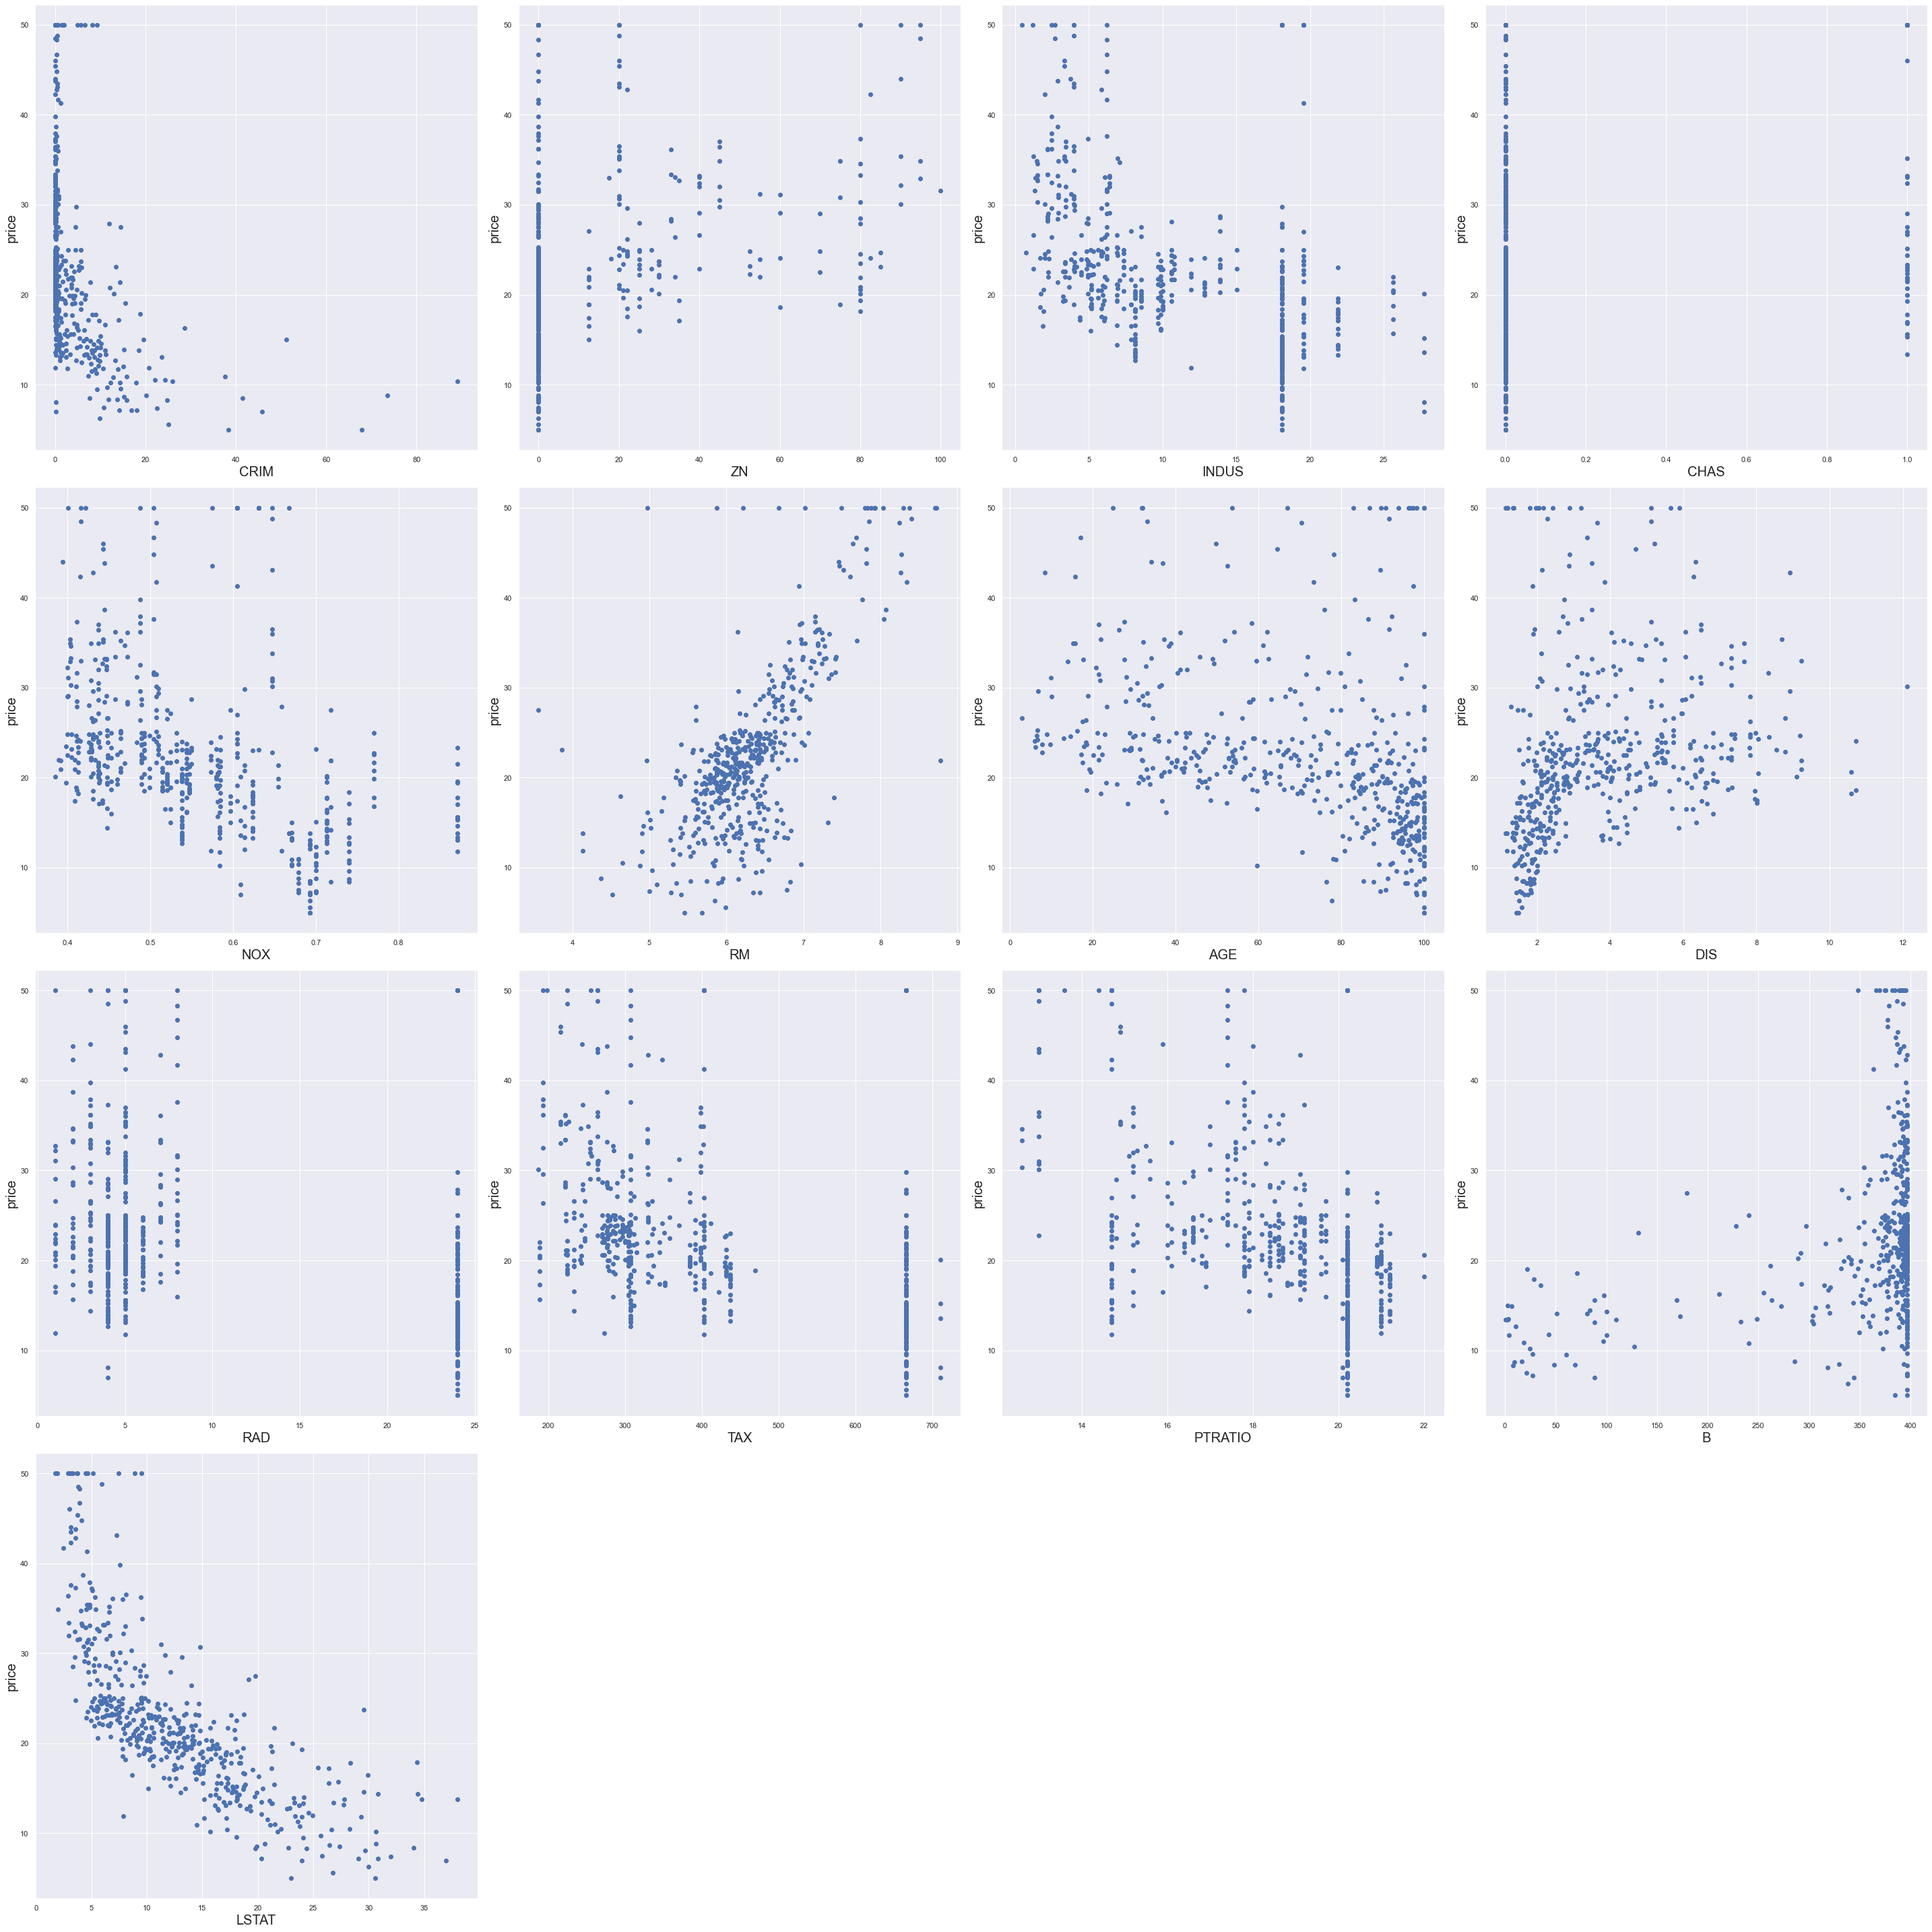

In [18]:
plt.figure(figsize=(40,40),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<20:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

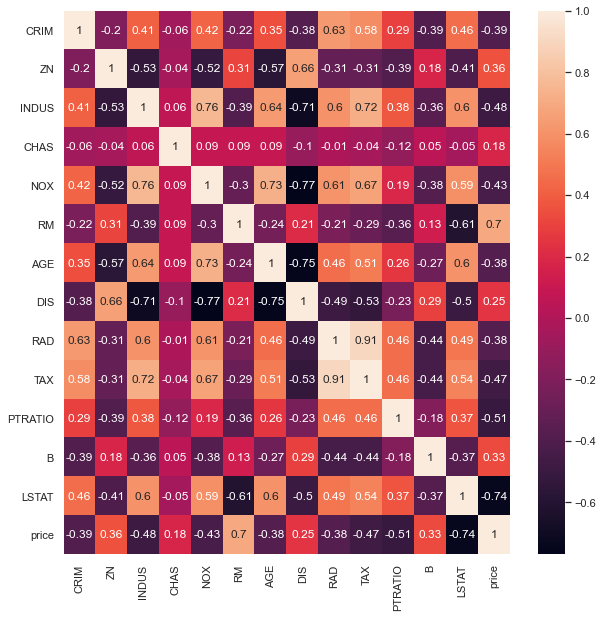

In [19]:
# Check the relation between the columns
plt.figure(figsize=(10,10))
data=bos.corr().round(2)
sns.heatmap(data,annot=True)

In [20]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=x_scaled

In [23]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif['features']=x.columns

In [24]:
vif

,VIF,features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [33]:
variables.shape[1]

13

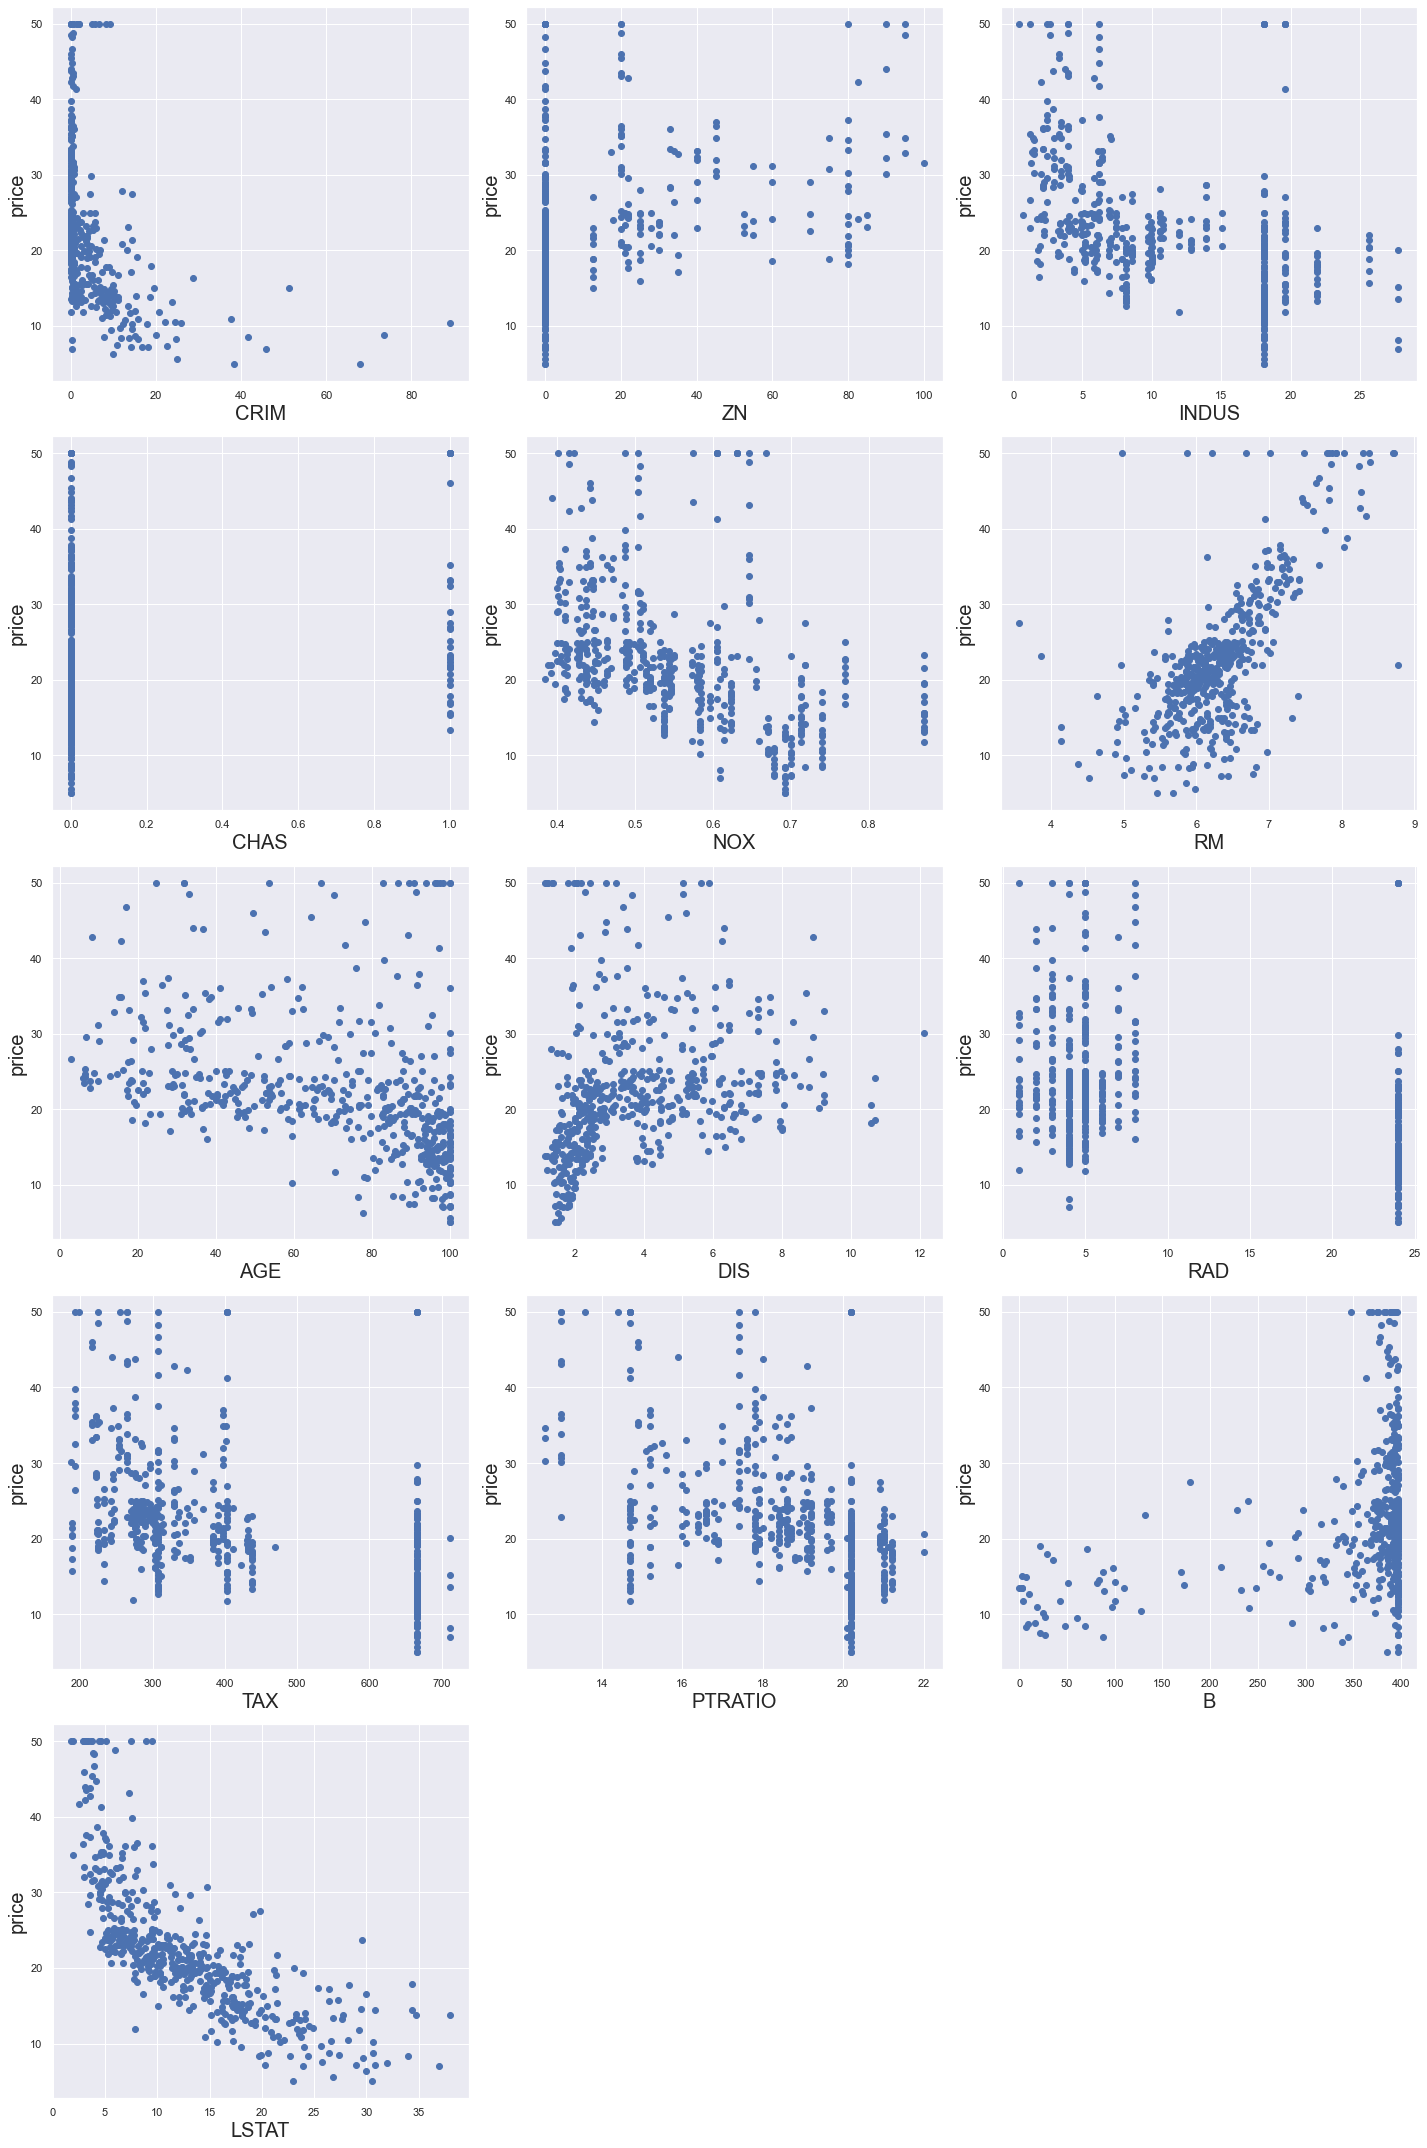

In [26]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=20:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [25]:
x=bos.drop(columns=['price','TAX'])

In [26]:
x_scaled=scaler.fit_transform(x)

In [27]:
variables=x_scaled
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif['features']=x.columns

In [28]:
vif

,VIF,features
0,1.791940,CRIM
1,2.184240,ZN
2,3.226015,INDUS
3,1.058220,CHAS
4,4.369271,NOX
5,1.923075,RM
6,3.098044,AGE
7,3.954446,DIS
8,2.837494,RAD
9,1.788839,PTRATIO


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=355)

In [30]:
y_train

227    31.6
382    11.3
23     14.5
348    24.5
157    41.3
       ... 
291    37.3
501    22.4
346    17.2
130    19.2
254    21.9
Name: price, Length: 379, dtype: float64

In [31]:
print(x_train.shape)
print(x_test.shape)

(379, 12)
(127, 12)


In [32]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [33]:
regression.score(x_train,y_train)

0.7263352878677987

In [34]:
print(regression.intercept_)

28.998973937082944


In [35]:
coeff_df=pd.DataFrame(regression.coef_,x.columns,columns=['Coefficient'])

In [36]:
coeff_df

,Coefficient
CRIM,-0.100772
ZN,0.042075
INDUS,-0.102096
CHAS,4.064114
NOX,-17.703941
RM,4.479470
AGE,-0.015195
DIS,-1.522607
RAD,0.116288
PTRATIO,-0.892174


In [37]:
pred=regression.predict(x_test)

In [38]:
print(pred)

[14.3745768  19.11154158 31.30829355 23.34735217  6.88992094 23.83620148
 20.95836341 19.26001394 43.29043576 20.65056235 25.25527036 24.08124392
 26.05316089 17.58530694 10.45667407 33.90710342 19.15217554 18.60418841
 24.24958999 17.32864699 19.47853896 22.60743592 32.80137869 24.79050736
 35.65261561 25.15402348 27.83636161 35.87397487 21.96013064 26.3342165
 21.13315782 24.63454009 15.66019449 20.66624689 19.12359257 24.25661213
 36.60210037 18.53830636 30.62211771 32.38579804 22.77230952 14.51978407
 19.13351154 19.47563708 19.814961   20.6644236  29.79408521 17.59977169
 22.05300499 18.04322845 18.36856341 19.37046062 15.22761045 30.57807871
 46.07738552  6.52134282 40.7687796  26.07443115 16.28179704 22.1635647
  9.54236789 22.84601796 12.68632312 22.24552933 24.44497361  9.87479338
 26.65887807 26.89157833 17.31438561 22.11710925 16.37054605 19.98077851
 30.27991309 19.90549115 18.1287349  36.55423945 20.20867842 14.27174863
 18.881002   16.61205309  8.83725871 17.5102276  32.6

Text(0, 0.5, 'Prediction')

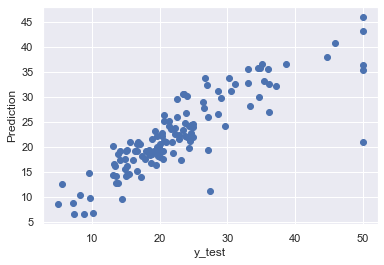

In [39]:
plt.scatter(y_test,pred)
plt.xlabel('y_test')
plt.ylabel('Prediction')

In [40]:
df1=pd.DataFrame({'Actual':y_test,'Prediction':pred})
df1.head()

,Actual,Prediction
488,15.2,14.374577
128,18.0,19.111542
191,30.5,31.308294
53,23.4,23.347352
388,10.2,6.889921


In [41]:
def adj_r2(x,y):
    r2=regression.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [42]:
adj_r2(x_train,y_train)

0.7173626743552675

In [50]:
regression.fit(x_test,y_test)

LinearRegression()

In [43]:
regression.score(x_test,y_test)

0.7431889797578284

In [44]:
adj_r2(x_test,y_test)

0.7161562407849682

In [45]:
lasscv=LassoCV(alphas=None, cv=10,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(cv=10, normalize=True)

In [46]:
alpha=lasscv.alpha_
alpha

0.00033837642965584046

In [47]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00033837642965584046)

In [48]:
lasso_reg.score(x_test,y_test)

0.7431929264422965

In [49]:
alphas=np.random.uniform(low=0,high=10,size=(50,))
ridgecv=RidgeCV(alphas=alphas,cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([1.93347446, 3.90793926, 9.58461371, 5.66664297, 8.41055295,
       7.96729747, 6.31214236, 7.55888813, 2.06352592, 3.16273198,
       8.09553157, 9.87261169, 9.53626358, 3.07378243, 7.79985527,
       5.75433699, 3.62610653, 4.11579195, 6.13567157, 7.89808936,
       4.07244069, 8.8593549 , 3.94559482, 3.72283283, 5.25239237,
       6.55540591, 1.38071871, 0.27359791, 1.98873655, 0.74512438,
       5.7534685 , 2.95080218, 0.17235748, 3.41944025, 6.35536921,
       1.86624283, 5.93233617, 1.09885252, 1.5230497 , 2.98416272,
       2.67824581, 6.19588145, 7.58665582, 3.79183998, 3.56761853,
       0.31215682, 3.72205044, 8.62863253, 3.79295359, 0.38064277]),
        cv=10, normalize=True)

In [50]:
ridgecv.alpha_

0.1723574752355972

In [51]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.1723574752355972)

In [52]:
ridge_model.score(x_test,y_test)

0.7423758671591427

In [53]:
elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [54]:
elasticCV.alpha_

0.5788466808084044

In [55]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [56]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.5788466808084044)

In [57]:
elasticnet_reg.score(x_test, y_test)

0.7424512241334551

In [58]:
import pickle

In [59]:
filename='finalized_model.pickle'
pickle.dump(regression,open(filename,'wb'))